# Quick test to make sure project has enough information

Disclaimer, used character research and no NLP tool

In [1]:
import io
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', None)

In [2]:
data_folder = 'data/'
matched_folder= data_folder + 'matched_beer_data/'

In [3]:
ratings_rb = pd.read_csv(matched_folder+ 'ratings_with_text_rb.csv')

In [4]:
display(ratings_rb)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1429178400,ciaranc,151109,3,7,2,8,17,3.7,"Bottle, gift from Aaron. Black, big head, lots..."
1,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1427796000,Rowlymo,198957,4,7,4,8,15,3.8,500ml Bottle in Bittles bar Belfast. Chocolate...
2,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1421665200,Don2711,285162,4,8,5,7,17,4.1,Great one and made very local to me. Bottle bo...
3,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1380621600,genegenie,224156,5,8,3,5,19,4.0,"Deep roasted aroma, good dark brown/black colo..."
4,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1371549600,kiwianer,88501,4,7,4,7,14,3.6,"The head is medium, the body black. It smells ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020594,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352977200,ogivlado,3019,2,3,2,3,6,1.6,"Bottled 500ml. -Courtesy of Marko, shared with..."
1020595,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352804400,Marko,15284,3,3,2,3,5,1.6,"0.5l bottle courtesy of KreÅ¡o, who brought it..."
1020596,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352631600,heavy,59683,2,2,2,3,5,1.4,"0.5 l bottle courtesy of Marko, thanks for sha..."
1020597,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1317117600,Quack-Duck,37612,3,4,2,4,10,2.3,"bottle, courtesy of KÃ¶lschtrinker - DankeschÃ..."


In [5]:
# Create 3 different columns according to the rating info, "bottle", "can", "draft"

bottle = ['bottle', 'bottled', 'bottles']
can = ['can', 'canned', 'cans']
draft = ['draft', 'draught', 'tap', 'taps']
# Create different columns if review text contains the word
ratings_rb['bottle'] = ratings_rb['text'].apply(lambda x: any(ele in x.lower() for ele in bottle))
ratings_rb['can'] = ratings_rb['text'].apply(lambda x: any(ele in x.lower() for ele in can))
ratings_rb['draft'] = ratings_rb['text'].apply(lambda x: any(ele in x.lower() for ele in draft))


In [6]:
ratings_rb.sample(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,bottle,can,draft
955981,Kasteel Rouge,9010,Brouwerij Van Honsebrouck,956,Fruit Beer,8.00,1232708400,ChainGangGuy,32031,4,7,4,7,15,3.7,"Appearance: Pours a clear, deep, dark ruby-hue...",False,True,False
198928,Celt Experience Celt Silures,174404,Celt Experience,14338,Session IPA,4.60,1450782000,LED40,139711,4,7,3,6,12,3.2,"330 ml bottle. Typical citrus IPA aroma, very ...",True,False,False
757279,BrainDead Gritz,336643,BrainDead Brewing,23201,Cream Ale,4.40,1460282400,SudsMcDuff,24583,4,7,4,7,15,3.7,7! 7! .. 7!!! .. . You thaâ goddamn devil. ....,False,False,True
420477,Lost Coast Alleycat Amber Ale,5606,Lost Coast Brewery & Cafe,461,Amber Ale,5.50,1150711200,KUEric,14229,3,6,3,6,12,3.0,"On Tap: Pours a deep copper color, little to n...",False,False,True
556289,Spelt Fetish,336722,Fetish Brewing Company,23204,Specialty Grain,7.22,1471773600,jtclockwork,104199,3,6,3,7,12,3.1,Bottle - pours yellow white head - nose/taste ...,True,False,False


In [7]:
# remove every row where columns bottle, can and draft are all False
ratings_rb = ratings_rb[ratings_rb[['bottle', 'can', 'draft']].any(axis=1)]
display(ratings_rb)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,bottle,can,draft
0,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1429178400,ciaranc,151109,3,7,2,8,17,3.7,"Bottle, gift from Aaron. Black, big head, lots...",True,False,False
1,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1427796000,Rowlymo,198957,4,7,4,8,15,3.8,500ml Bottle in Bittles bar Belfast. Chocolate...,True,False,False
2,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1421665200,Don2711,285162,4,8,5,7,17,4.1,Great one and made very local to me. Bottle bo...,True,False,False
6,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1382436000,Beersiveknown,128086,4,7,4,5,13,3.3,"Bottle at Bittles Bar, BelfastHazy amber brown...",True,False,False
9,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1339581600,visionthing,91324,4,7,4,7,14,3.6,"50cl bottle (4,8% ABV) at Bittles Bar, Belfast...",True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020592,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1377338400,omhper,2778,2,5,3,6,10,2.6,"Bottled at PBF. Clear yellow, brief lively he...",True,False,False
1020594,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352977200,ogivlado,3019,2,3,2,3,6,1.6,"Bottled 500ml. -Courtesy of Marko, shared with...",True,False,False
1020595,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352804400,Marko,15284,3,3,2,3,5,1.6,"0.5l bottle courtesy of KreÅ¡o, who brought it...",True,False,False
1020596,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352631600,heavy,59683,2,2,2,3,5,1.4,"0.5 l bottle courtesy of Marko, thanks for sha...",True,False,False


In [8]:
# remove every row with more than 1 true
ratings_rb = ratings_rb[ratings_rb[['bottle', 'can', 'draft']].sum(axis=1) == 1]
display(ratings_rb)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,bottle,can,draft
0,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1429178400,ciaranc,151109,3,7,2,8,17,3.7,"Bottle, gift from Aaron. Black, big head, lots...",True,False,False
1,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1427796000,Rowlymo,198957,4,7,4,8,15,3.8,500ml Bottle in Bittles bar Belfast. Chocolate...,True,False,False
2,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1421665200,Don2711,285162,4,8,5,7,17,4.1,Great one and made very local to me. Bottle bo...,True,False,False
6,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1382436000,Beersiveknown,128086,4,7,4,5,13,3.3,"Bottle at Bittles Bar, BelfastHazy amber brown...",True,False,False
9,Ards Pig Island Pale Ale,160664,Ards Brewing Co.,13538,Bitter,5.2,1339581600,visionthing,91324,4,7,4,7,14,3.6,"50cl bottle (4,8% ABV) at Bittles Bar, Belfast...",True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020592,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1377338400,omhper,2778,2,5,3,6,10,2.6,"Bottled at PBF. Clear yellow, brief lively he...",True,False,False
1020594,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352977200,ogivlado,3019,2,3,2,3,6,1.6,"Bottled 500ml. -Courtesy of Marko, shared with...",True,False,False
1020595,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352804400,Marko,15284,3,3,2,3,5,1.6,"0.5l bottle courtesy of KreÅ¡o, who brought it...",True,False,False
1020596,Korça 01 Lager Beer,153090,Birra Korça,8244,Pale Lager,4.1,1352631600,heavy,59683,2,2,2,3,5,1.4,"0.5 l bottle courtesy of Marko, thanks for sha...",True,False,False


In [9]:
# print the number of reviews with bottle, can and draft
print('Number of reviews with bottle: ', ratings_rb['bottle'].sum())
print('Number of reviews with can: ', ratings_rb['can'].sum())
print('Number of reviews with draft: ', ratings_rb['draft'].sum())

Number of reviews with bottle:  327509
Number of reviews with can:  69369
Number of reviews with draft:  157776


In [10]:
#create a new column with the serving type
ratings_rb['serving_type'] = ratings_rb[['bottle', 'can', 'draft']].idxmax(axis=1)
ratings_rb.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,bottle,can,draft,serving_type
132540,Buddelship Gotland 1394,318570,Buddelship Brauerei,19993,Baltic Porter,6.5,1426762800,jfb,77747,3,5,3,6,14,3.1,(draught) ruby-black colour with a frothy ligh...,False,False,True,draft
175522,Gaffel Kölsch,1692,Privatbrauerei Gaffel Becker & Co.,301,Kölsch,4.8,1123581600,MrRomero,3083,4,6,3,7,14,3.4,Draft: poured golden yellow with a big white h...,False,False,True,draft
286217,Beerbliotek Klippans India Pale Ale,241705,Beerbliotek,16341,India Pale Ale (IPA),6.0,1396260000,gyllenbock,90466,3,7,3,7,15,3.5,"Bottle from Systembolaget, e-order in March 20...",True,False,False,bottle


In [12]:
# print some reviews for each serving type
print('Reviews with bottle:\n')
for text in ratings_rb[ratings_rb['serving_type'] == 'bottle']['text'].sample(3):
    print(text)
    print('----------------------')
print('Reviews with can:\n')
for text in ratings_rb[ratings_rb['serving_type'] == 'can']['text'].sample(3):
    print(text)
    print('----------------------')
print('Reviews with draft:\n')
for text in ratings_rb[ratings_rb['serving_type'] == 'draft']['text'].sample(3):
    print(text)
    print('----------------------')

Reviews with bottle:

Bottle from YNWA Beershop, Kolding. Clear very dark brown with an off-white head. Aroma is sweet, malty, caramel and roasted malt. Flavor is quite sweet and moderate bitter. Dry and roasted moderate bitter finish. 020813
----------------------
(33cl bottle) Hazy, dark mahogany colour with a mid-sized, beige foamy head. Sweet and berry-fruity, slightly toasty malt aroma with hints of liquorice and a whiff of caramel. Moderately sweet, slightly bitter flavour, just medium bodied, soft on carbon. Toasty malty and fruity taste with notes of chocolate; moderately dry, bitter-sweet and slightly toasty and a bit slim, slightly spicy finish.
----------------------
Bottle: Poured a clear golden color ale with a nice large white foamy head with good retention and some lacing. Aroma of light floral undertones with some light honey notes also perceptible. Taste is a mix of light rustic malt with honey and floral undertones with a subtle spicy yeast also noticeable. Body is ab

In [13]:
# print the average value of the rating for each serving type
comp_str = 'overall'
print('Average ' + comp_str + ' for bottle: ', round(ratings_rb[ratings_rb['serving_type'] == 'bottle'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for can: ', round(ratings_rb[ratings_rb['serving_type'] == 'can'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for draft: ', round(ratings_rb[ratings_rb['serving_type'] == 'draft'][comp_str].mean(), 3))

Average overall for bottle:  13.572
Average overall for can:  13.596
Average overall for draft:  13.922


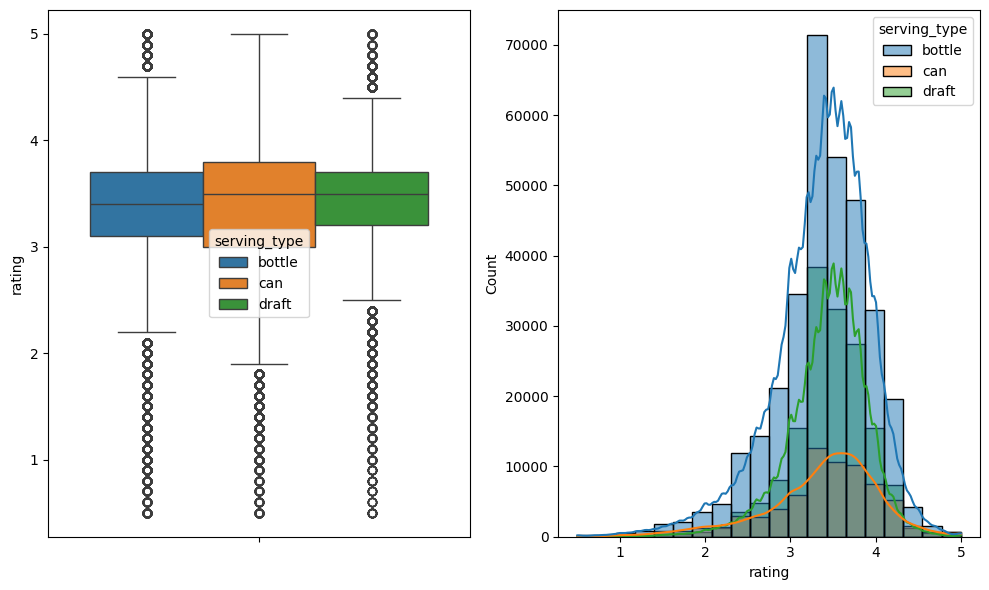

In [14]:
# show boxplot of ratings for bottle, can and draft
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(data=ratings_rb, hue='serving_type', y='rating')
plt.subplot(122)
sns.histplot(data=ratings_rb, hue='serving_type', x='rating', kde=True, bins=20)
plt.tight_layout()
plt.show()

In [15]:
def do_ttest(type1, type2, category):
    ttest = ttest_ind(ratings_rb[ratings_rb['serving_type'] == type1][category],ratings_rb[ratings_rb['serving_type'] == type2][category])
    if ttest[1] > 0.05:
        print('The p-value is high (' + str(ttest[1]) + '), so we cannot reject the null hypothesis that the two samples have the same average')
    else:
        print('The p-value is very low (' + str(ttest[1]) + '), so we can reject the null hypothesis that the two samples have the same average')


In [18]:
do_ttest('draft', 'bottle', 'rating')

The p-value is very low (0.0), so we can reject the null hypothesis that the two samples have the same average
